In [1]:
# Import necessary classes
from utils.graphics.Image import Image
from utils.graphics.Point import Point
from digitization.Preprocessorv2 import Preprocessor 

In [2]:
import copy
import io
from os.path import splitext
from typing import Iterable, Sequence, Tuple
import cv2 as cv
import numpy as np
from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError
from utils.graphics.ColorSpace import ColorSpace
from utils.graphics.Point import Point
from utils.graphics.Rectangle import Rectangle

class CustomImage:
    """
    A class that combines the functionalities of the original CustomImage and Image classes.
    """

    def __init__(self, array: np.ndarray = None, path: str = None) -> None:
        """
        Initialization of the image, either from an array or from a path.

        Args:
            array (np.ndarray): Numpy array containing the image data.
            path (str): Path to the image file.

        Raises:
            TypeError: If array is not a numpy array.
            FileNotFoundError: If the file does not exist.
        """
        self.__color_space = ColorSpace.BGR
        self.__data = None

        if array is not None:
            if isinstance(array, np.ndarray):
                self.__data = array
            else:
                raise TypeError("Expected a numpy.ndarray object")
        elif path is not None:
            _, file_extension = splitext(path)
            pdf_except = False
            if file_extension == ".pdf":
                try:
                    buffer = io.BytesIO()
                    pdf = convert_from_path(path)
                    pdf[0].save(buffer, format="png")
                    buffer.seek(0)
                    img_arr = np.frombuffer(buffer.getvalue(), dtype=np.uint8)
                    buffer.close()
                    self.__data = cv.imdecode(img_arr, cv.IMREAD_COLOR)
                except PDFPageCountError:
                    pdf_except = True
            else:
                self.__data = cv.imread(path)
            if self.__data is None or pdf_except:
                raise FileNotFoundError(f'File "{path}" does not exist')
        else:
            raise ValueError("Either array or path must be provided")

    def __getitem__(self, index: Sequence) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data[index]

    def __setitem__(self, index: Sequence, value: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data[index] = value

    @property
    def data(self) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data

    @data.setter
    def data(self, data: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data = data

    @property
    def height(self) -> int:
        return self.__data.shape[0]

    @property
    def width(self) -> int:
        return self.__data.shape[1]

    @property
    def white(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 255
        if self.__color_space == ColorSpace.HSV:
            return [0, 0, 255]
        return [255, 255, 255]

    @property
    def black(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 0
        return [0, 0, 0]
    

    @property
    def array(self):
        return self.data  # Assuming self.data is your image's numpy array.

    def copy(self) -> 'CustomImage':
        return copy.deepcopy(self)

    def save(self, path: str) -> None:
        self.to_BGR()
        cv.imwrite(path, self.__data)

    def crop(self, r: Rectangle) -> None:
        tl = r.top_left
        br = r.bottom_right
        self.__data = self.__data[tl.y : br.y, tl.x : br.x]

    def threshold(self, thres: int, value: int) -> None:
        _, self.__data = cv.threshold(self.__data, thres, value, cv.THRESH_BINARY)
        self.to_GRAY()

    def line(self, p1: Point, p2: Point, color: Tuple[int, int, int], thickness: int):
        cv.line(self.__data, (p1.x, p1.y), (p2.x, p2.y), color, thickness=thickness)

    def is_GRAY(self) -> bool:
        return self.__color_space == ColorSpace.GRAY

    def is_BGR(self) -> bool:
        return self.__color_space == ColorSpace.BGR

    def is_RGB(self) -> bool:
        return self.__color_space == ColorSpace.RGB

    def is_HSV(self) -> bool:
        return self.__color_space == ColorSpace.HSV

    def to_GRAY(self) -> None:
        if self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2GRAY)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2GRAY)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2GRAY)
        self.__color_space = ColorSpace.GRAY

    def to_BGR(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2BGR)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2BGR)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2BGR)
        self.__color_space = ColorSpace.BGR

    def to_RGB(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2RGB)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2RGB)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2RGB)
        self.__color_space = ColorSpace.RGB

    def to_HSV(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2HSV)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2HSV)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2HSV)
        self.__color_space = ColorSpace.HSV


## Final Test: correct lead number 1-6, enforce leads based on x

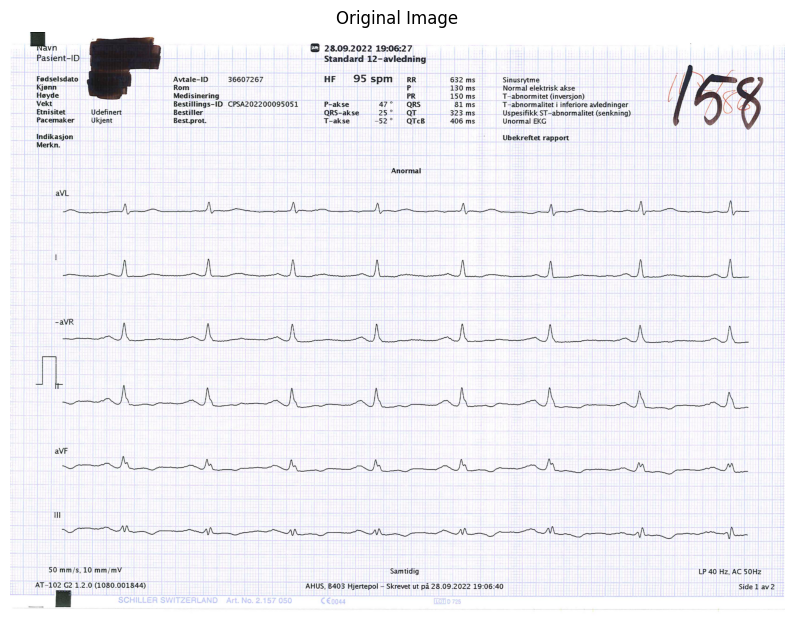

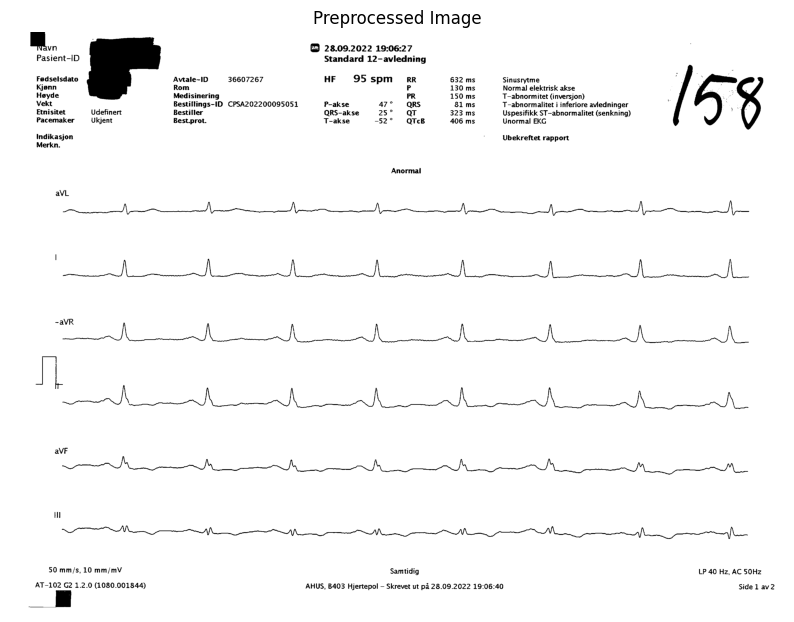

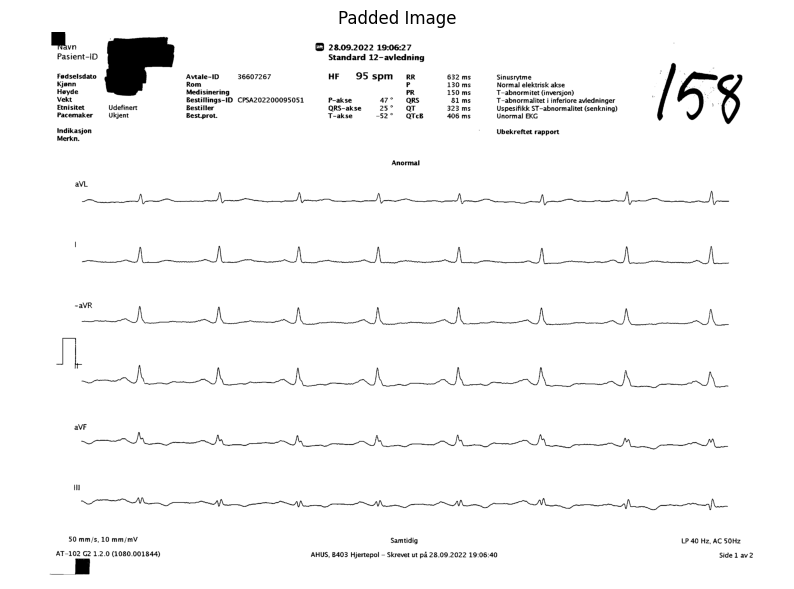

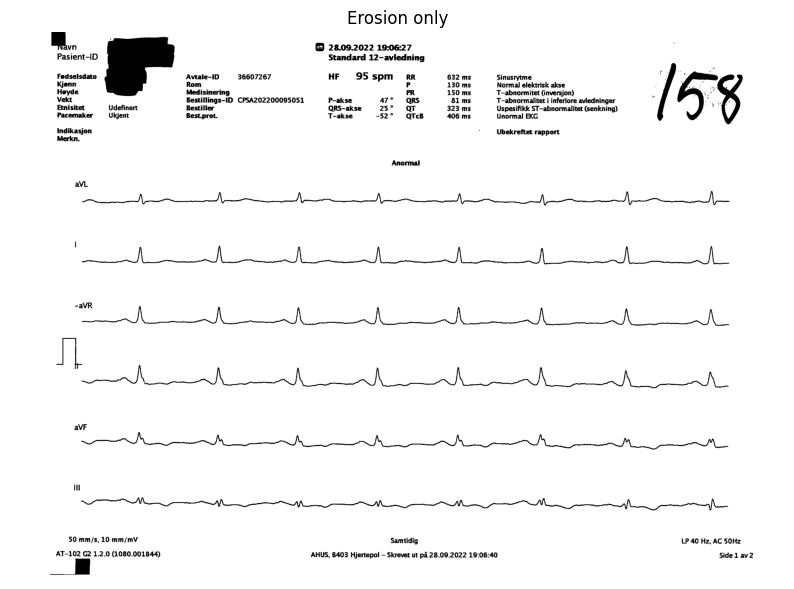

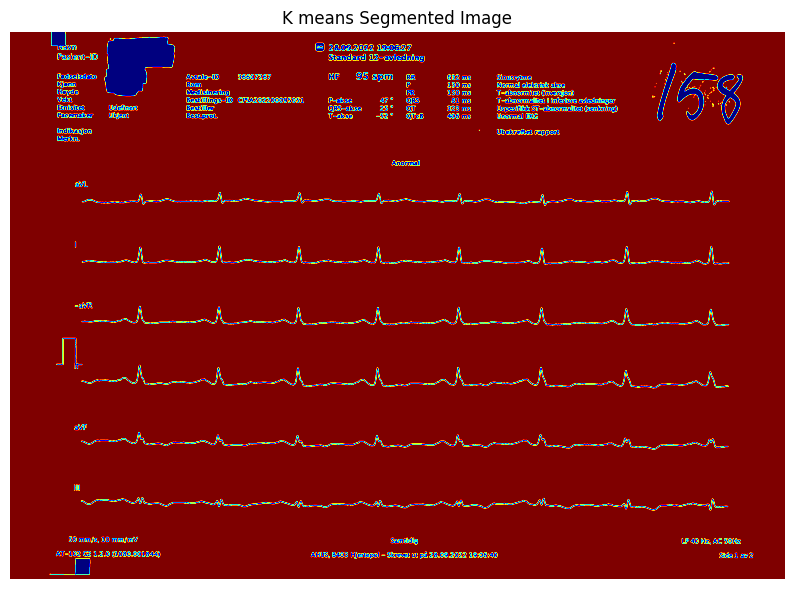

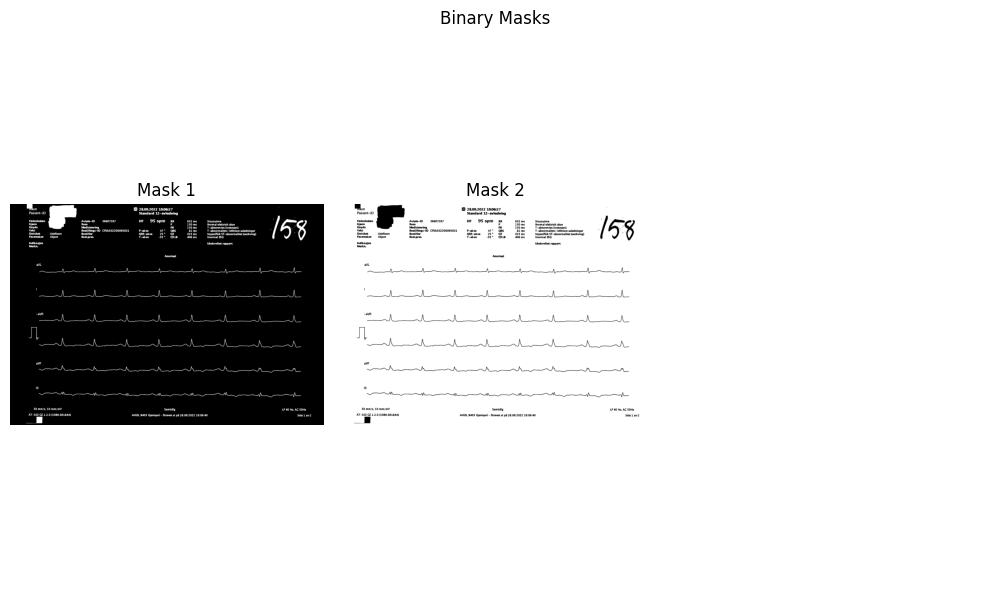

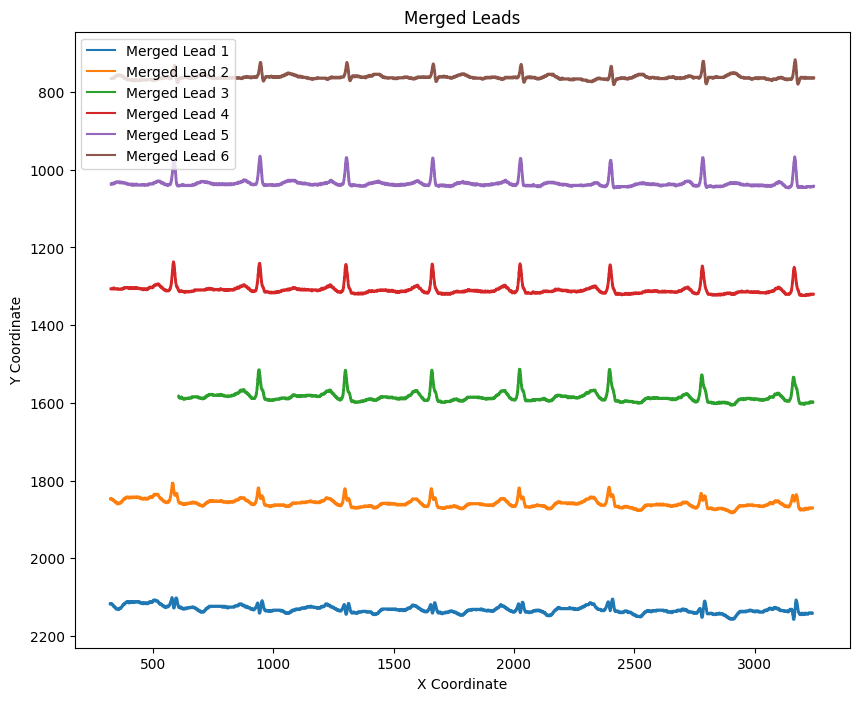

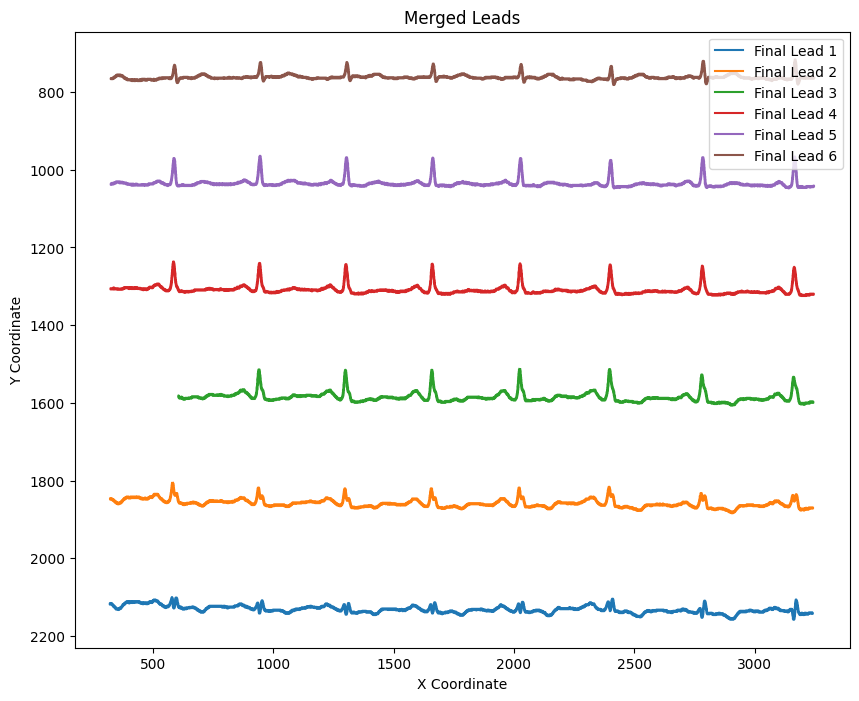

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


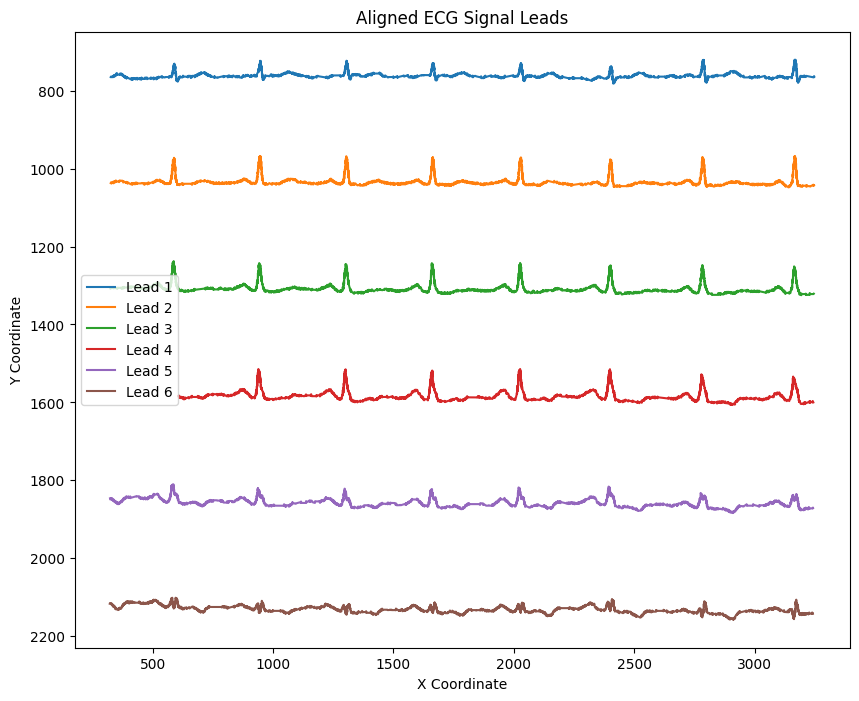

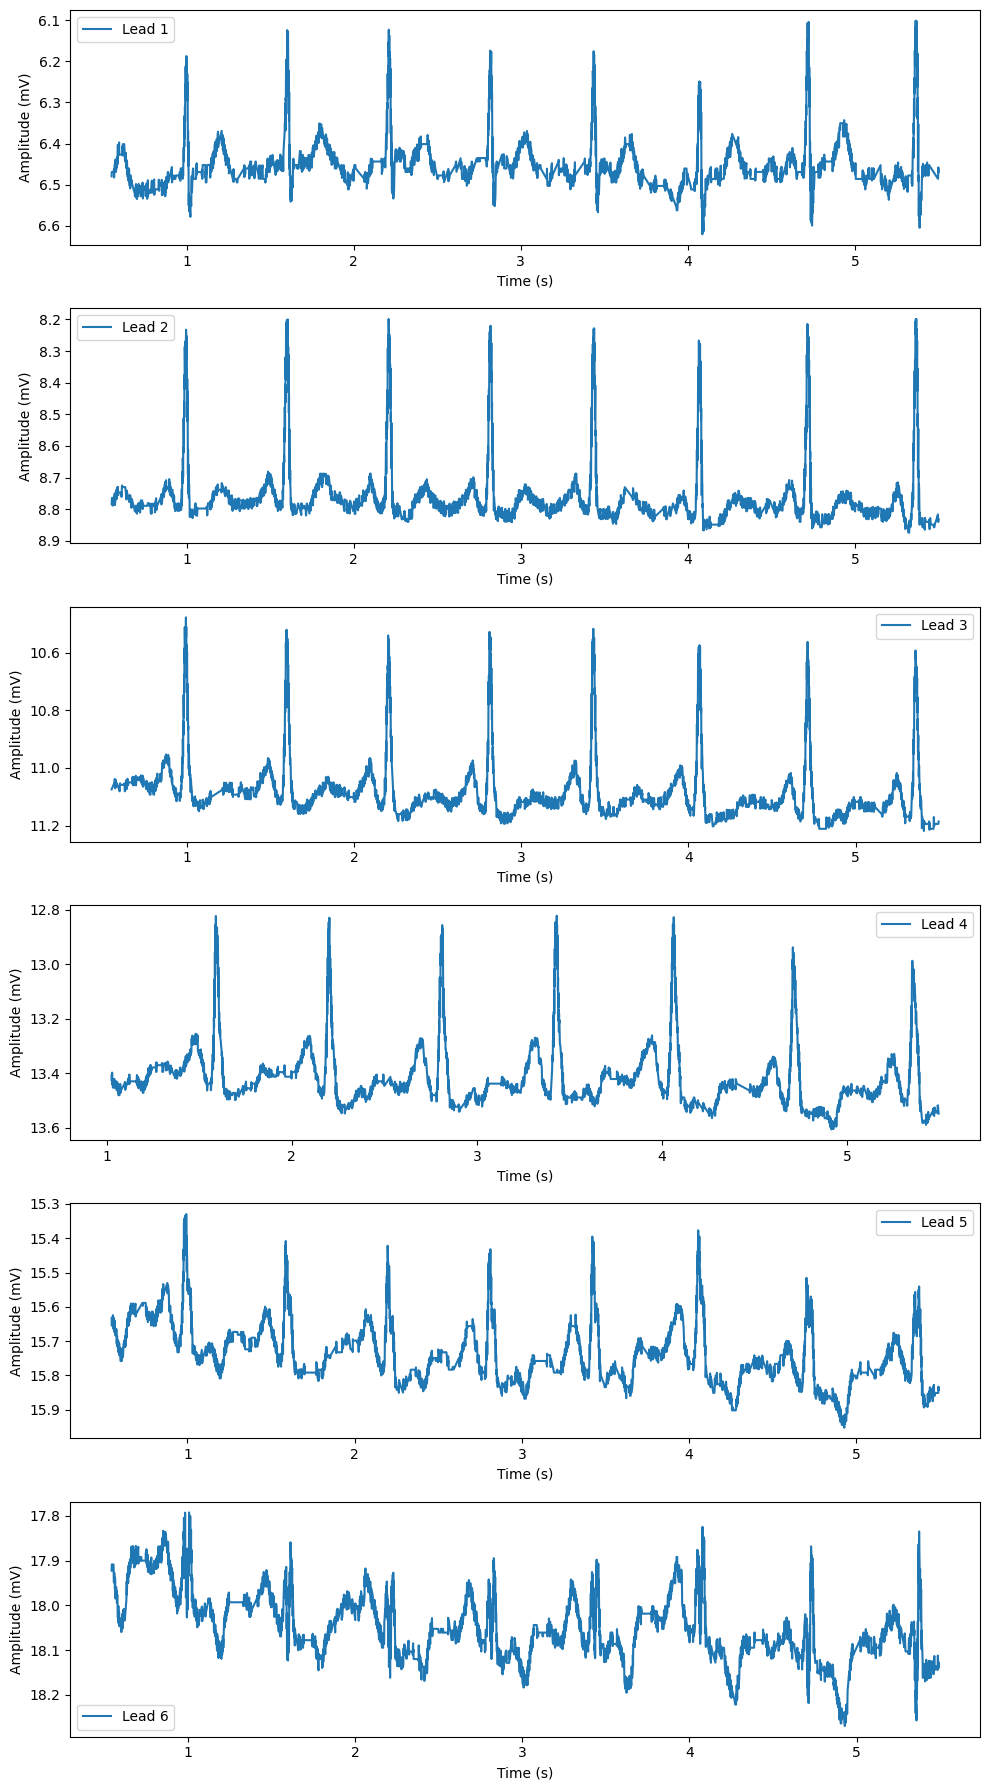

Time and amplitude values have been saved to ecg_time_amplitude.csv


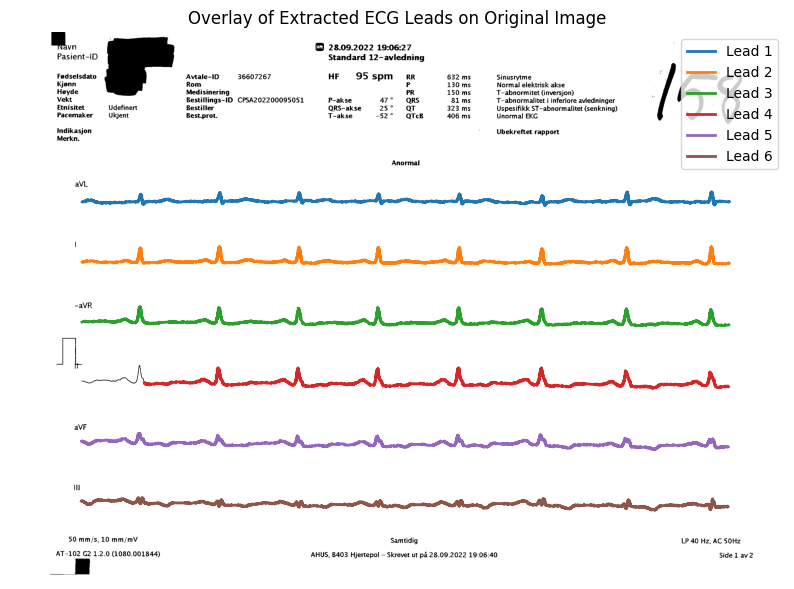

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

from sklearn.mixture import GaussianMixture

def apply_gmm(image, n_components=2):
    Z = image.reshape((-1, 1))
    Z = np.float32(Z)

    gmm = GaussianMixture(n_components=n_components, covariance_type='tied')
    gmm.fit(Z)
    labels = gmm.predict(Z)
    
    segmented_image = labels.reshape(image.shape)
    return segmented_image, gmm.means_




def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords
    
def plot_time_amplitude_single_column(time_amplitude_df):
    """
    Plots each lead's time-amplitude in a single column layout, with reversed plot order but consistent lead numbering.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for the leads.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Reverse the lead order but keep the numbering consistent
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        # Reverse the plotting order, keeping numbering intact
        reversed_lead_num = num_leads - lead_num + 1
        time_col = f'Lead_{reversed_lead_num}_time'
        amp_col = f'Lead_{reversed_lead_num}_amplitude'

        # Only plot if both time and amplitude columns exist in the DataFrame
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            plt.subplot(num_leads, 1, i + 1)
            plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
            plt.title(f'Lead {lead_num}')  # Keep numbering consistent
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        else:
            print(f"Skipping Lead {reversed_lead_num} as it's missing in the DataFrame")

    plt.tight_layout()
    plt.show()




def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()

# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)



def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_lead_time_amplitude(time_amplitude_df):
    """
    Plots time vs amplitude for each lead in the time_amplitude_df DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for each lead.
    """
    num_leads = len([col for col in time_amplitude_df.columns if '_time' in col])
    
    plt.figure(figsize=(10, num_leads * 3))
    
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amplitude_col = f'Lead_{i}_amplitude'
        
        plt.subplot(num_leads, 1, i)  # Creates a subplot for each lead
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {i}')
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()



def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]
        f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
        x_new = np.linspace(x.min(), x.max(), num_points)
        y_new = f_interp(x_new)
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords

def image_to_sequence(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    Reverses the lead numbering.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    num_leads = len(contour_coords)

    for i, coords in enumerate(contour_coords):
        # Reverse the lead numbering
        lead_number = num_leads - i
        
        time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        
        lead_data[f'Lead_{lead_number}_time'] = time_values
        lead_data[f'Lead_{lead_number}_amplitude'] = amplitude_values

    return pd.DataFrame(lead_data)

# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    
    # ############################################
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    plot_image(img_erosion, 'Erosion only')

    # Apply GMM segmentation on the padded image
    # segmented_image, centers = apply_gmm(padded_image, n_components=2)
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)
    # plot_image(segmented_image, "Segmented Image (GMM)", cmap='jet')
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    
    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    # Only pull leads
    final_leads = enforce_only_leads(merged_leads)
    plot_final_leads(final_leads)  # Plot merged leads

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)
    # print(aligned_leads)
    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead (sequence extraction)
    time_amplitude_df = image_to_sequence(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    # Assuming time_amplitude_df is already created from image_to_sequence function
    plot_lead_time_amplitude(time_amplitude_df)


    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")
    # # Plot each lead's time vs. amplitude with 6 rows and 1 column
    # plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)

    return aligned_leads, time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/158_F_page_1.png'
aligned_leads, time_amplitude_df = process_ecg_image(image_path)




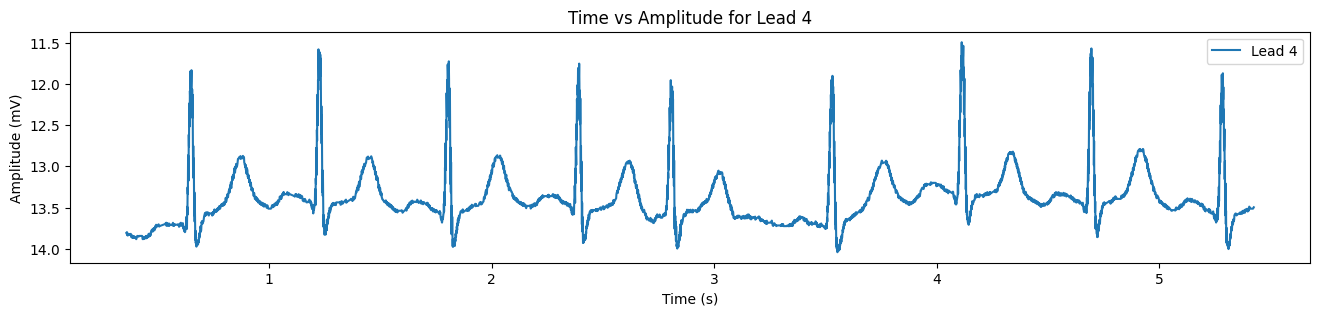

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
time_amplitude_df = pd.read_csv('ecg_time_amplitude.csv')

# Function to plot a specific lead
def plot_single_lead(time_amplitude_df, lead_number):
    """
    Plots time vs amplitude for a specific lead in the DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude data.
    :param lead_number: The lead number to plot (e.g., 1 for Lead 1).
    """
    # Construct column names for the specific lead
    time_col = f'Lead_{lead_number}_time'
    amplitude_col = f'Lead_{lead_number}_amplitude'
    
    # Check if the columns exist in the DataFrame
    if time_col in time_amplitude_df.columns and amplitude_col in time_amplitude_df.columns:
        # Plot the lead's time vs amplitude
        plt.figure(figsize=(16, 3))
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {lead_number}')
        plt.gca().invert_yaxis()  # Invert y-axis to match typical ECG display
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.title(f'Time vs Amplitude for Lead {lead_number}')
        plt.legend()
        plt.show()
    else:
        print(f"Lead {lead_number} not found in the DataFrame.")

# Example: Plot Lead 1
plot_single_lead(time_amplitude_df, lead_number=4)


## Add cubic spline interpolation

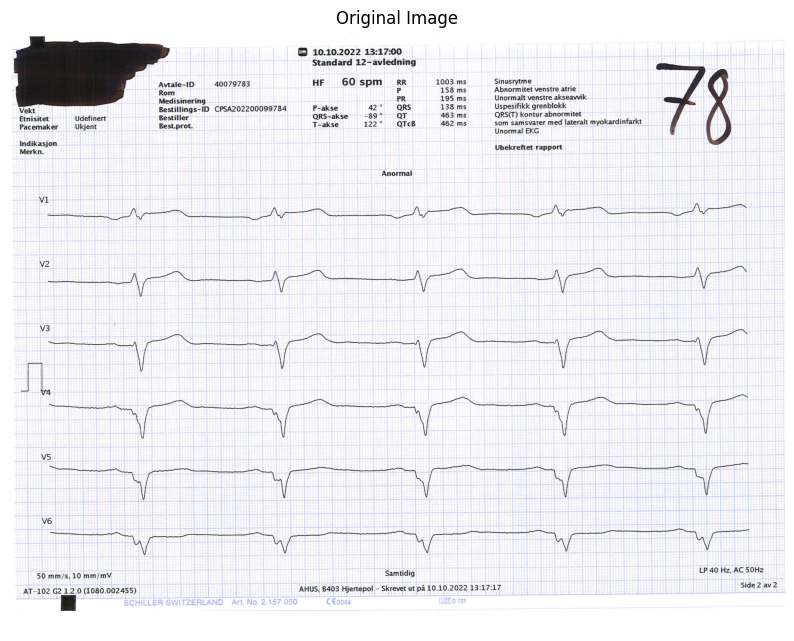

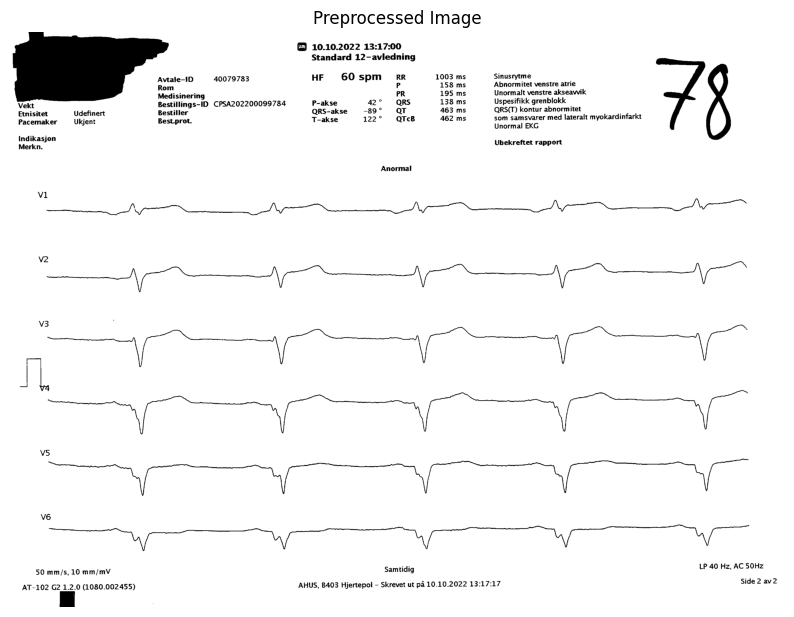

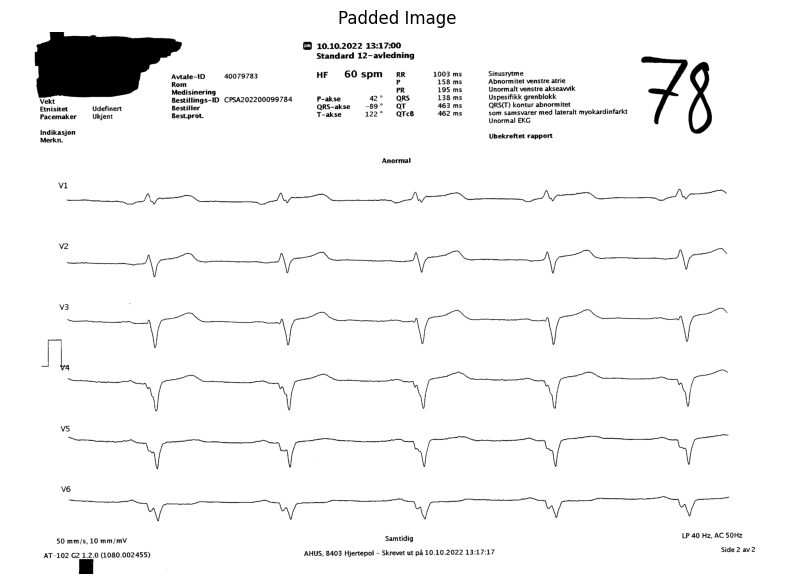

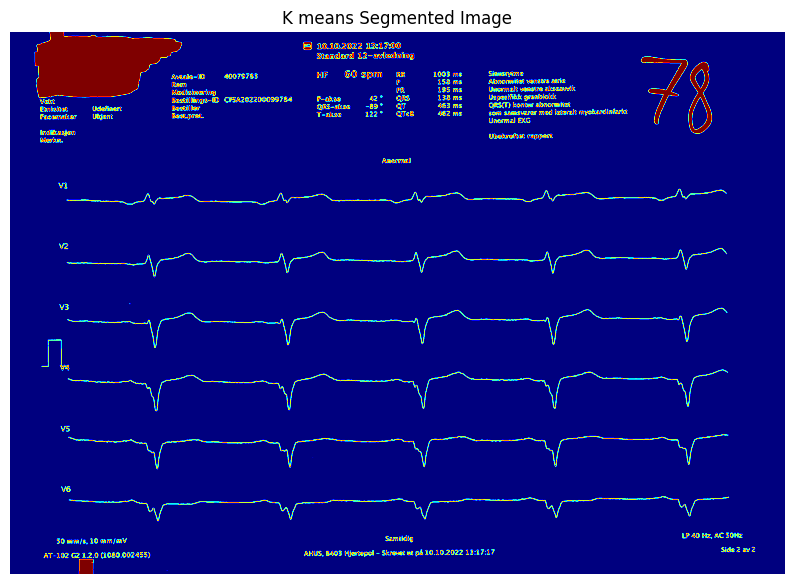

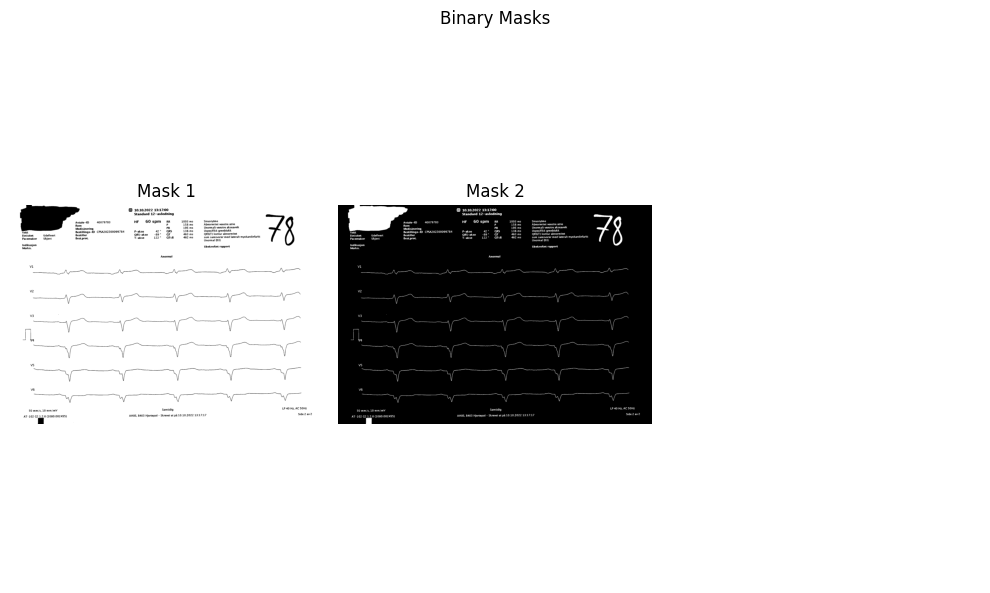

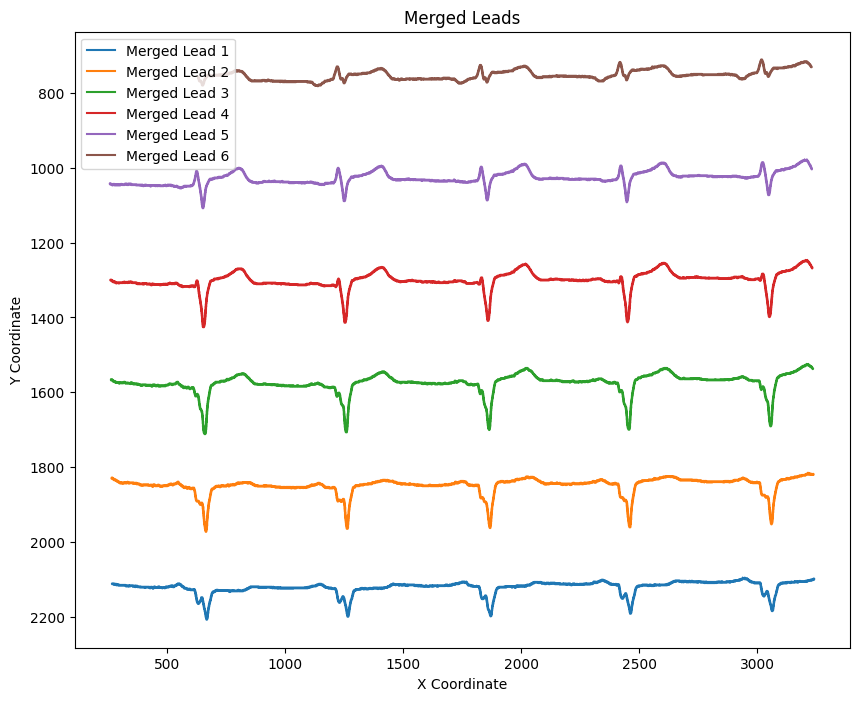

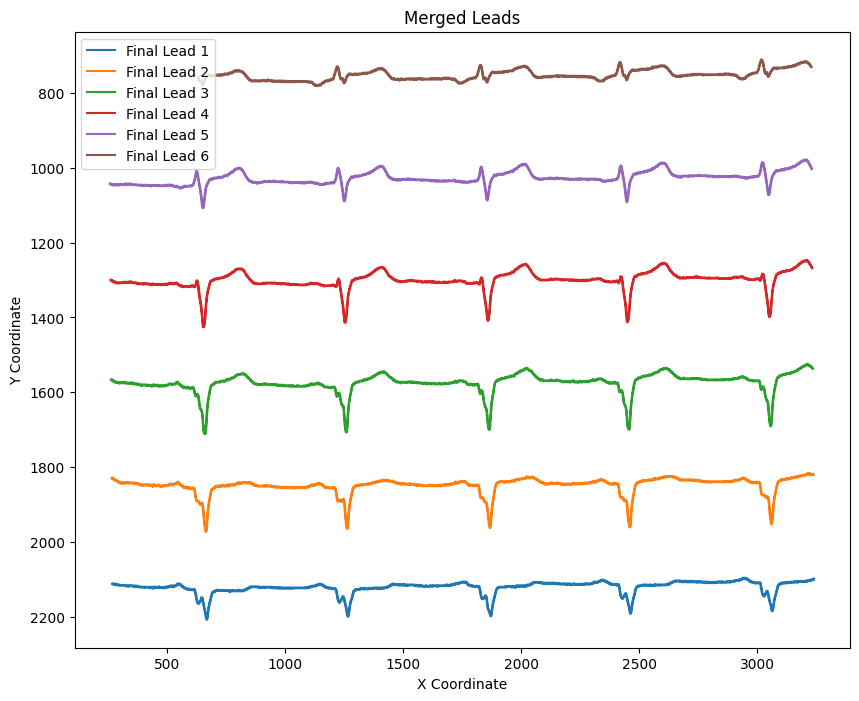

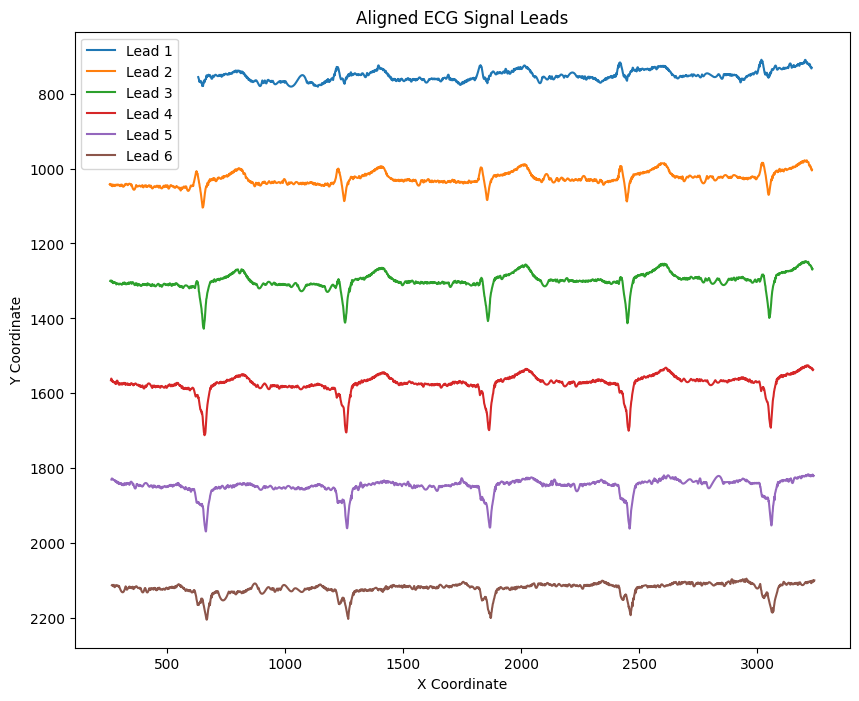

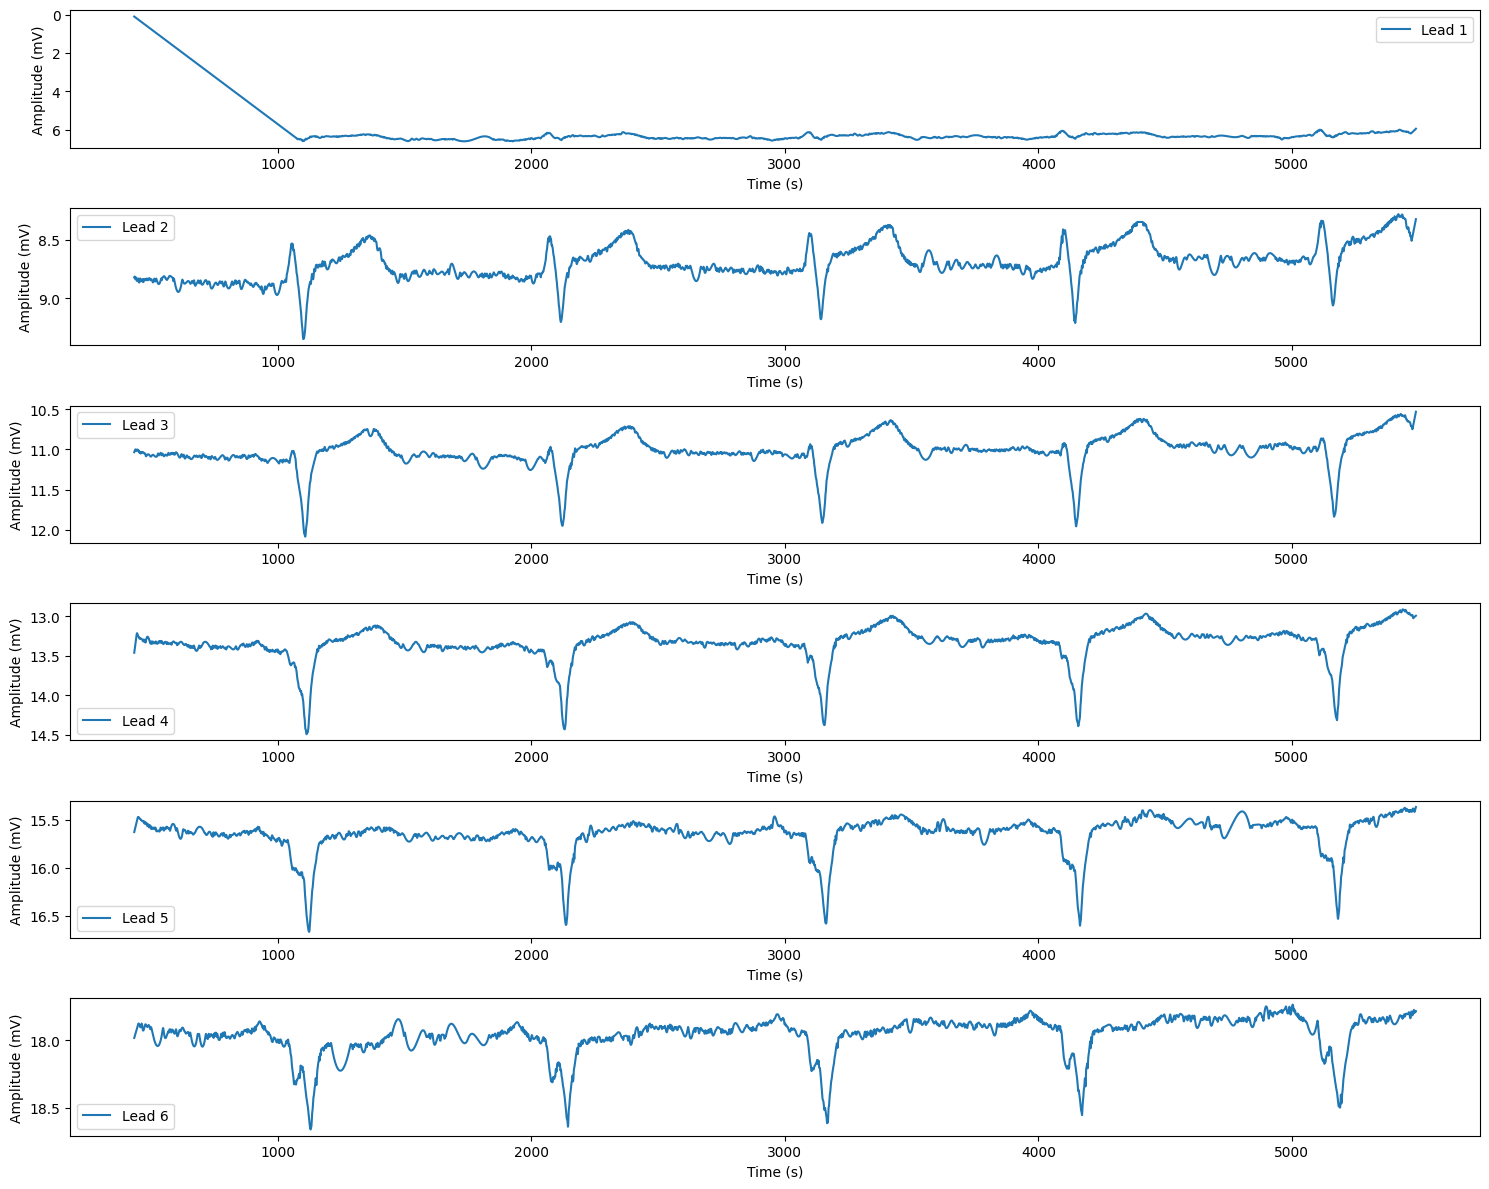

Time and amplitude values have been saved to ecg_time_amplitude.csv


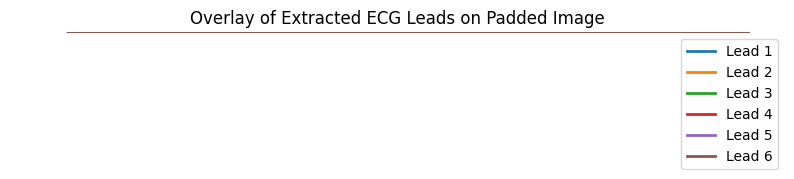

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

from sklearn.mixture import GaussianMixture

def apply_gmm(image, n_components=2):
    Z = image.reshape((-1, 1))
    Z = np.float32(Z)

    gmm = GaussianMixture(n_components=n_components, covariance_type='tied')
    gmm.fit(Z)
    labels = gmm.predict(Z)
    
    segmented_image = labels.reshape(image.shape)
    return segmented_image, gmm.means_




def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

# def resample_contour(contour, num_points=100):
#     x = contour[:, 0]
#     y = contour[:, 1]
#     f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
#     x_new = np.linspace(0, len(x) - 1, num_points)
#     x_resampled = f_interp(x_new)
#     f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
#     y_resampled = f_interp(x_new)
#     return np.column_stack((x_resampled, y_resampled))

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    # Apply cubic spline interpolation for resampling
    f_interp_x = interp1d(np.arange(len(x)), x, kind='cubic', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp_x(x_new)
    
    f_interp_y = interp1d(np.arange(len(y)), y, kind='cubic', fill_value="extrapolate")
    y_resampled = f_interp_y(x_new)
    
    return np.column_stack((x_resampled, y_resampled))


def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords
    
def plot_time_amplitude_single_column(time_amplitude_df):
    """
    Plots each lead's time-amplitude in a single column layout, with reversed plot order but consistent lead numbering.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for the leads.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Reverse the lead order but keep the numbering consistent
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        # Reverse the plotting order, keeping numbering intact
        reversed_lead_num = num_leads - lead_num + 1
        time_col = f'Lead_{reversed_lead_num}_time'
        amp_col = f'Lead_{reversed_lead_num}_amplitude'

        # Only plot if both time and amplitude columns exist in the DataFrame
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            plt.subplot(num_leads, 1, i + 1)
            plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
            plt.title(f'Lead {lead_num}')  # Keep numbering consistent
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        else:
            print(f"Skipping Lead {reversed_lead_num} as it's missing in the DataFrame")

    plt.tight_layout()
    plt.show()




# def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
#     """
#     Plots the ECG leads overlaying on the original ECG image.

#     :param image_path: The path to the original ECG image or the image matrix.
#     :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
#     :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
#     :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
#     """

#     plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

#     # Plot the original ECG image
#     plt.imshow(image_path, cmap='gray')

#     # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
#     pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
#     pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

#     # Dynamically determine the number of leads from the DataFrame columns
#     lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
#     num_leads = len(lead_columns)

#     # Overlay each lead present in time_amplitude_df
#     for i in range(1, num_leads + 1):
#         time_col = f'Lead_{i}_time'
#         amp_col = f'Lead_{i}_amplitude'
        
#         if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
#             # Convert time and amplitude back to pixel coordinates
#             x_pixels = time_amplitude_df[time_col] * pixel_per_time
#             y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

#             plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
#         else:
#             print(f"Skipping Lead {i} as it's missing in the DataFrame")

#     plt.title('Overlay of Extracted ECG Leads on Original Image')
#     plt.xlabel('Time (pixels)')
#     plt.ylabel('Amplitude (pixels)')
    
#     plt.legend()
#     plt.axis('off')  # Hide axis since we're overlaying on an image
#     plt.show()


def plot_time_amplitude_overlay(image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y, padding_size):
    """
    Plots the ECG leads overlaying on the original ECG image, using aligned lead coordinates.

    :param image: The original ECG image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    :param padding_size: The size of the padding added to the image.
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image, cmap='gray')

    # Reverse Conversion factors (convert time in ms and amplitude in mV back to pixel coordinates)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Overlay each lead present in time_amplitude_df
    num_leads = (len(time_amplitude_df.columns) // 2)
    for i in range(num_leads):
        # Extract the time and amplitude values
        time_values = time_amplitude_df[f'Lead_{i + 1}_time'].values
        amplitude_values = time_amplitude_df[f'Lead_{i + 1}_amplitude'].values
        
        # Convert time values to pixel coordinates (considering padding)
        x_pixels = time_values * pixel_per_time + padding_size  # Adjust by left padding
        y_pixels = image.shape[0] - (amplitude_values * pixel_per_amplitude)  # Invert y-coordinates

        # Plot each lead
        plt.plot(x_pixels, y_pixels, label=f'Lead {i + 1}', linewidth=2)

    plt.title('Overlay of Extracted ECG Leads on Padded Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')

    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()



# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)

# Function to extract time and amplitude from aligned leads
def extract_time_amplitude_1ms(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # Convert to milliseconds
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time in ms
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude in mV
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    # Convert to DataFrame and return
    return pd.DataFrame(lead_data)

def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_lead_time_amplitude(time_amplitude_df):
    """
    Plots time vs amplitude for each lead in the time_amplitude_df DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for each lead.
    """
    num_leads = len([col for col in time_amplitude_df.columns if '_time' in col])
    
    plt.figure(figsize=(15, num_leads * 2))
    
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amplitude_col = f'Lead_{i}_amplitude'
        
        plt.subplot(num_leads, 1, i)  # Creates a subplot for each lead
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {i}')
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()



# def align_leads(contour_coords, num_points=5000):
#     aligned_coords = []
#     for coords in contour_coords:
#         x = coords[:, 0]
#         y = coords[:, 1]
#         f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
#         x_new = np.linspace(x.min(), x.max(), num_points)
#         y_new = f_interp(x_new)
#         aligned_coords.append(np.column_stack((x_new, y_new)))
#     return aligned_coords

import numpy as np
from scipy.interpolate import CubicSpline

def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]

        # Remove duplicate x values to ensure CubicSpline works correctly
        unique_x, unique_indices = np.unique(x, return_index=True)
        unique_y = y[unique_indices]
        
        # Apply cubic spline interpolation
        cs = CubicSpline(unique_x, unique_y)
        
        # Generate new x values for interpolation
        x_new = np.linspace(unique_x.min(), unique_x.max(), num_points)
        y_new = cs(x_new)
        
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords



# def image_to_sequence(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
#     """
#     Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
#     Reverses the lead numbering.
    
#     :param contour_coords: A list of contour coordinates (x, y).
#     :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
#     :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
#     :return: DataFrame containing time and amplitude for each lead.
#     """
#     lead_data = {}

#     # Conversion factors
#     # time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
#     time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # Convert to milliseconds
#     amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

#     num_leads = len(contour_coords)

#     for i, coords in enumerate(contour_coords):
#         # Reverse the lead numbering
#         lead_number = num_leads - i
        
#         time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time
#         amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        
#         lead_data[f'Lead_{lead_number}_time'] = time_values
#         lead_data[f'Lead_{lead_number}_amplitude'] = amplitude_values

#     return pd.DataFrame(lead_data)


def image_to_sequence_1ms(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    Enforces 1 ms time steps by interpolation.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead with 1 ms time steps.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # Convert to milliseconds
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    num_leads = len(contour_coords)

    # Find the minimum and maximum time across all leads
    all_time_values = []
    for coords in contour_coords:
        time_values = coords[:, 0] * time_per_pixel
        all_time_values.extend(time_values)
    
    min_time = min(all_time_values)
    max_time = max(all_time_values)

    # Create a common uniformly spaced time array for all leads
    uniform_time_values = np.arange(min_time, max_time, 1)  # 1 ms step

    for i, coords in enumerate(contour_coords):
        # Reverse the lead numbering
        lead_number = num_leads - i
        
        # Original time and amplitude values
        original_time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time in ms
        original_amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude in mV
        
        # Interpolate amplitude values to fit the uniform time grid
        interp_func = interp1d(original_time_values, original_amplitude_values, kind='linear', fill_value="extrapolate")
        interpolated_amplitude_values = interp_func(uniform_time_values)
        
        # Save the uniformly spaced time and interpolated amplitude values
        lead_data[f'Lead_{lead_number}_time'] = uniform_time_values
        lead_data[f'Lead_{lead_number}_amplitude'] = interpolated_amplitude_values

    return pd.DataFrame(lead_data)

# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    
    # Apply GMM segmentation on the padded image
    # segmented_image, centers = apply_gmm(padded_image, n_components=2)
    segmented_image, centers = apply_kmeans(padded_image, n_clusters=2)
    # plot_image(segmented_image, "Segmented Image (GMM)", cmap='jet')
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    
    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    # Only pull leads
    final_leads = enforce_only_leads(merged_leads)
    plot_final_leads(final_leads)  # Plot merged leads

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)
    # print(aligned_leads)
    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead (sequence extraction)
    time_amplitude_df = image_to_sequence_1ms(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    # Assuming time_amplitude_df is already created from image_to_sequence function
    plot_lead_time_amplitude(time_amplitude_df)


    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")
    # # Plot each lead's time vs. amplitude with 6 rows and 1 column
    # plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y, padding_size)

    return aligned_leads, time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/78_F_page_2.png'
aligned_leads, time_amplitude_df = process_ecg_image(image_path)




In [ ]:

# # File paths
# digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120219.848511_new.csv"  # Path to your actual data file for 105
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120306.333710_new.csv"  # Path to your actual data file For 158 page 1


## Validation with max-min Leads 1-6

## Smooth with rolling window + reorder

Rolling Window Calculation:

For each column (lead) in the DataFrame, a rolling window is applied using rolling().
The rolling(window=window_size, center=True) creates a sliding window of size window_size that moves across the data, centered on each data point.
The mean() function is applied to the window to compute the average of the data points within the window, effectively smoothing the data.

## Test by aligning offset

PCC Results:
                Lead       PCC
0  Lead_1_amplitude -0.090888
1  Lead_2_amplitude  0.170163
2  Lead_3_amplitude  0.520426
3  Lead_4_amplitude  0.521227
4  Lead_5_amplitude -0.484840
5  Lead_6_amplitude  0.454735
RMSE Results:
                Lead         RMSE
0  Lead_1_amplitude   257.694944
1  Lead_2_amplitude   761.970736
2  Lead_3_amplitude   971.429354
3  Lead_4_amplitude   103.311470
4  Lead_5_amplitude   285.728743
5  Lead_6_amplitude  1027.753425


C:\Users\ROG\AppData\Local\Temp\ipykernel_27332\3070804147.py:180: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed_moving_avg = digitized_df_smoothed_moving_avg.fillna(method='ffill').fillna(method='bfill')


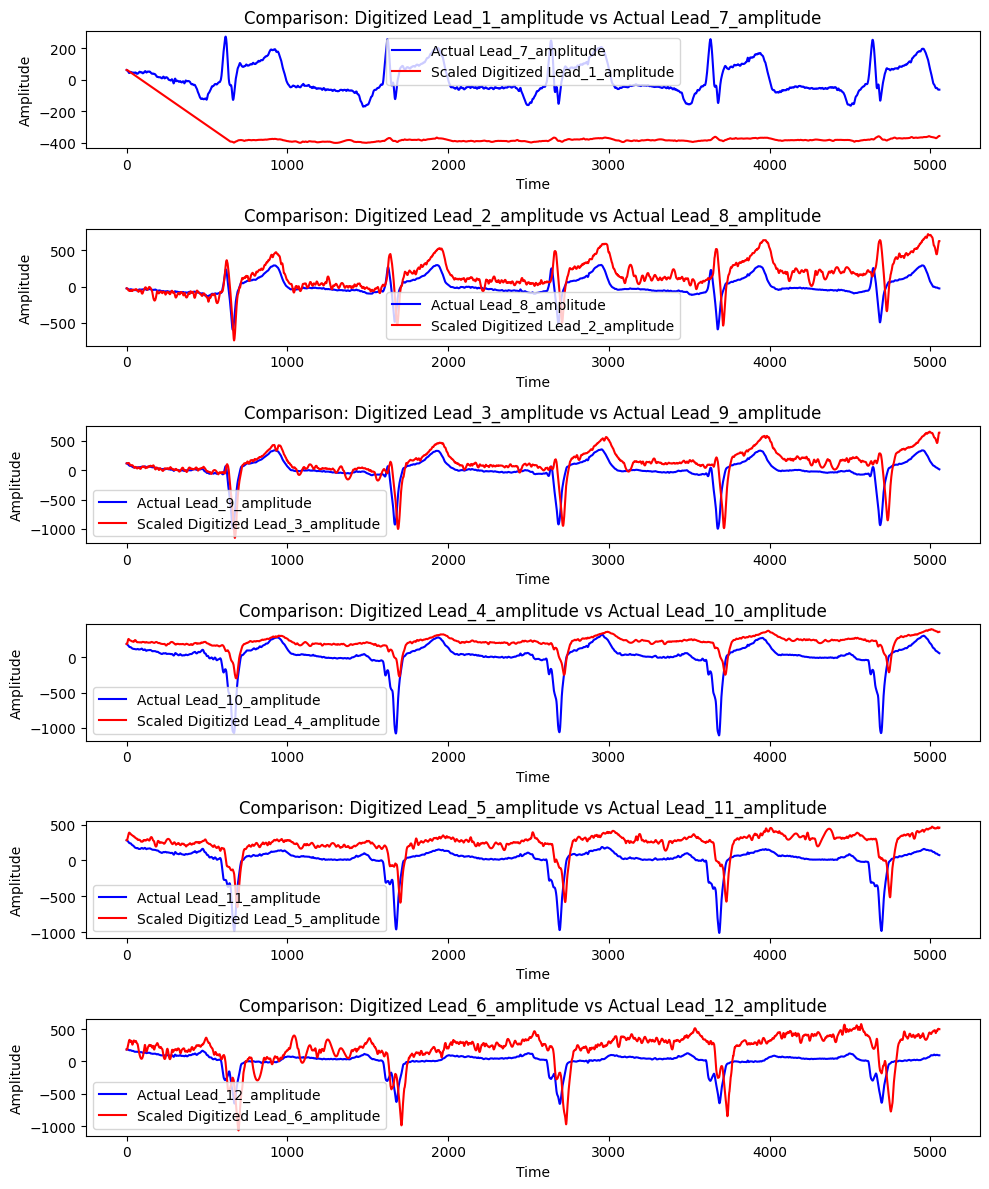

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.interpolate import CubicSpline

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"78_F_page_2.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120203.154255_new.csv"  # Path to your actual data file for 8786
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120219.848511_new.csv"  # Path to your actual data file for 105
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120306.333710_new.csv"  # Path to your actual data file For 158 page 1

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)


def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df, lead_mapping):
    """
    Plots each mapped lead's time-amplitude for scaled digitized data in a single column layout,
    with digitized data values inverted but without inverting the y-axis.
    
    Lead mapping can specify custom comparisons between digitized and actual leads, 
    with the option to flip certain leads from the actual data.

    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    :param lead_mapping: Dictionary specifying the mapping from digitized leads to actual leads. 
                         If a tuple is used, the second element indicates whether to flip the actual lead.
    """
    num_leads = len(lead_mapping)

    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead based on the mapping
    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        # Handle flipping for specific leads
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead comparison: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        # Apply flipping if needed
        if flip:
            y_actual = -y_actual

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate the shift to align the digitized values with the actual values
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Shift the digitized values

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label=f'Actual {actual_lead}', color='blue')
        plt.plot(y_digitized, label=f'Scaled Digitized {digitized_lead}', color='red')
        plt.title(f'Comparison: Digitized {digitized_lead} vs Actual {actual_lead}')  # Display mapping
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()



def smooth_leads_with_moving_average(digitized_df, window_size=5):
    """
    Apply moving average smoothing to the digitized leads data.
    
    :param digitized_df: DataFrame containing digitized lead data.
    :param window_size: Size of the moving window.
    :return: Smoothed DataFrame.
    """
    digitized_df_smoothed = digitized_df.copy()

    for lead in digitized_df.columns:
        digitized_df_smoothed[lead] = digitized_df[lead].rolling(window=window_size, center=True).mean()
    
    return digitized_df_smoothed

# Apply moving average smoothing to the scaled digitized data
digitized_df_smoothed_moving_avg = smooth_leads_with_moving_average(digitized_df_scaled, window_size=7)

# Use interpolation for NaNs between valid data points
digitized_df_smoothed_moving_avg = digitized_df_smoothed_moving_avg.interpolate(method='linear')

# Forward fill the NaNs at the start and backward fill at the end
digitized_df_smoothed_moving_avg = digitized_df_smoothed_moving_avg.fillna(method='ffill').fillna(method='bfill')

# # Check if there are still NaN values
# print(digitized_df_smoothed_moving_avg.isna().sum())


# Example lead mapping:
# Lead 1 of digitized_df_smoothed should be matched with Lead 5 of actual_df
# Lead 4 of digitized_df_smoothed should be matched with the flipped version of Lead 4 of actual_df
# Define lead mappings for page 1 and page 2
lead_mapping_page_1 = {
    'Lead_1_amplitude': 'Lead_5_amplitude',
    'Lead_2_amplitude': 'Lead_1_amplitude',
    'Lead_3_amplitude': 'Lead_2_amplitude',
    'Lead_4_amplitude': ('Lead_4_amplitude', True),  # Flip Lead_4 of actual_df
    'Lead_5_amplitude': 'Lead_6_amplitude',
    'Lead_6_amplitude': 'Lead_3_amplitude'
}

lead_mapping_page_2 = {
    'Lead_1_amplitude': 'Lead_7_amplitude',
    'Lead_2_amplitude': 'Lead_8_amplitude',
    'Lead_3_amplitude': 'Lead_9_amplitude',
    'Lead_4_amplitude': 'Lead_10_amplitude',
    'Lead_5_amplitude': 'Lead_11_amplitude',
    'Lead_6_amplitude': 'Lead_12_amplitude'
}

# Check the filename and select the appropriate lead mapping
if "_page_1.csv" in digitized_file_path:
    lead_mapping = lead_mapping_page_1
elif "_page_2.csv" in digitized_file_path:
    lead_mapping = lead_mapping_page_2
else:
    raise ValueError("The digitized file path does not match the expected format.")

# Plot the smoothed data
plot_scaled_digitized_single_column(digitized_df_smoothed_moving_avg, actual_df, lead_mapping)


### Dunamic Time warping

Lead: Lead_1_amplitude - Actual length: 5000, Digitized length: 5000


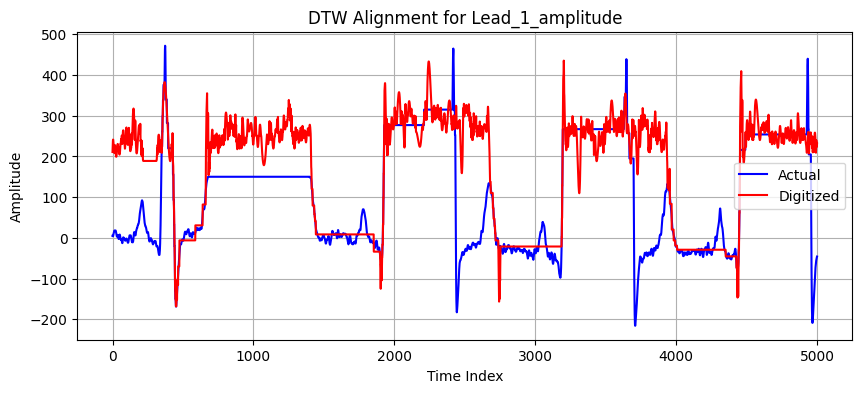

Lead: Lead_2_amplitude - Actual length: 5000, Digitized length: 5000


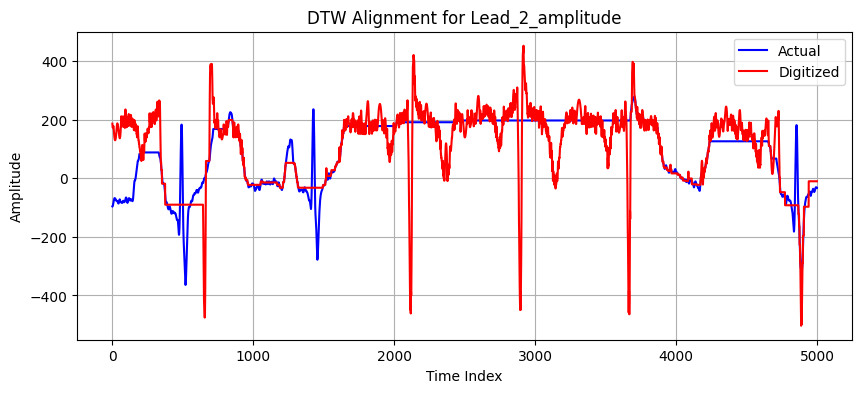

Lead: Lead_3_amplitude - Actual length: 5000, Digitized length: 5000


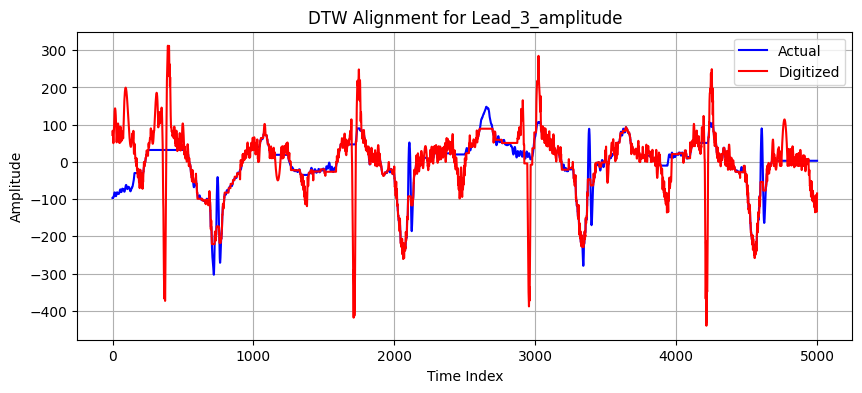

Lead: Lead_4_amplitude - Actual length: 5000, Digitized length: 5000


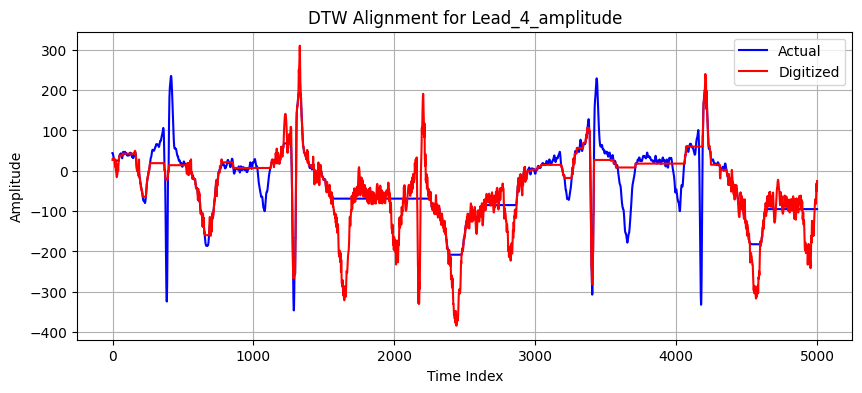

Lead: Lead_5_amplitude - Actual length: 5000, Digitized length: 5000


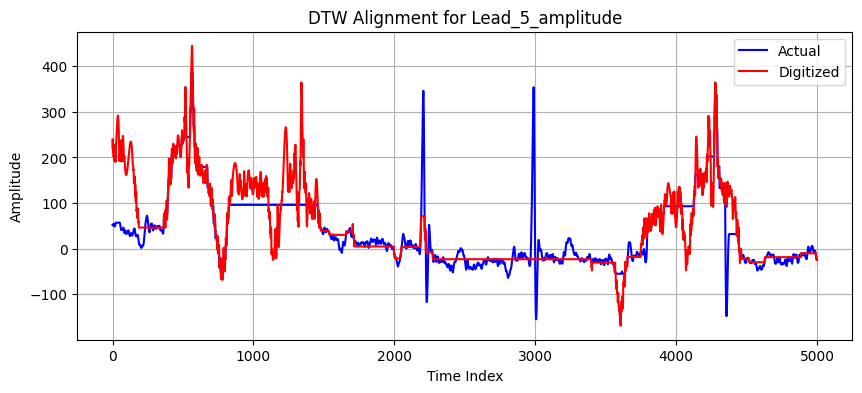

Lead: Lead_6_amplitude - Actual length: 5000, Digitized length: 5000


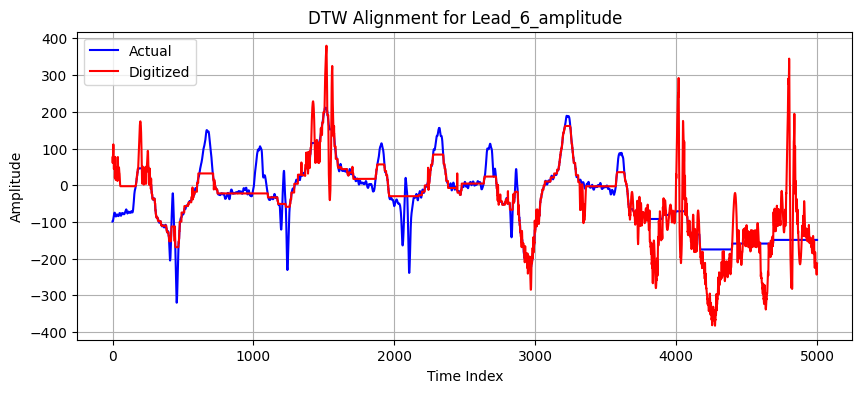

DTW Results:
                Lead   DTW_Distance  \
0  Lead_1_amplitude  667070.457179   
1  Lead_2_amplitude  434489.653503   
2  Lead_3_amplitude  233797.752598   
3  Lead_4_amplitude  331811.494701   
4  Lead_5_amplitude  286983.447577   
5  Lead_6_amplitude  406163.798237   

                                                Path  
0  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...  
1  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...  
2  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...  
3  [(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...  
4  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...  
5  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...  


C:\Users\ROG\AppData\Local\Temp\ipykernel_17668\3827008578.py:156: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


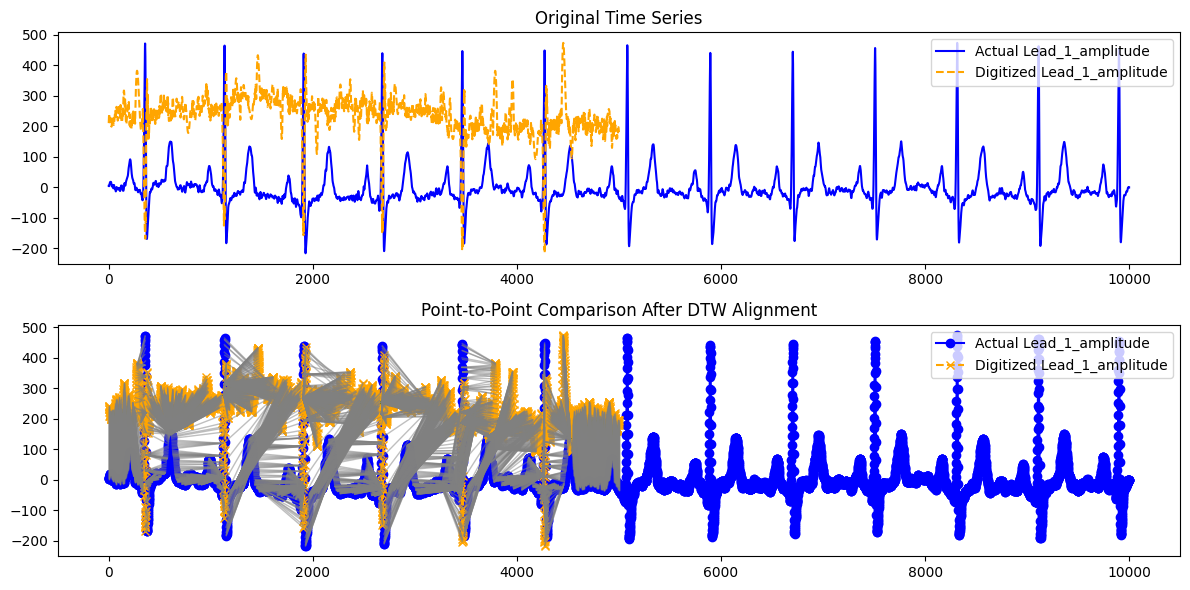

In [8]:
import numpy as np
import pandas as pd
from fastdtw import fastdtw
import matplotlib.pyplot as plt

# File paths
digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120219.848511_new.csv"  # Path to your actual data file for 105
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120306.333710_new.csv"  # Path to your actual data file For 158 page 1

# Load your data (as per your previous code)
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)


# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Function to compare leads using DTW
# Function to compare leads using DTW
def compare_leads_with_dtw(actual_df, digitized_df, leads, actual_steps=5000):
    dtw_results = []

    for lead in leads:
        if lead not in actual_df.columns or lead not in digitized_df.columns:
            print(f"Lead '{lead}' is missing in one of the DataFrames.")
            continue

        # Take only the first 5000 steps from the actual data
        y_actual = actual_df[lead].dropna().values[:actual_steps]  # Slice first 5000 steps
        
        # Ensure digitized data has at most 5000 steps as well
        y_digitized = digitized_df[lead].dropna().values[:actual_steps]  # Match the actual_steps limit

        # Calculate DTW distance and path
        distance, path = fastdtw(y_actual, y_digitized)
        
        dtw_results.append({'Lead': lead, 'DTW_Distance': distance, 'Path': path})

    return pd.DataFrame(dtw_results)




# Compare the leads
# Compare the leads
def plot_dtw_results(actual_df, digitized_df, dtw_results_df, max_steps=5000):
    for index, row in dtw_results_df.iterrows():
        lead = row['Lead']
        path = row['Path']  # DTW path

        if lead not in actual_df.columns or lead not in digitized_df.columns:
            continue

        y_actual = actual_df[lead].dropna().values
        y_digitized = digitized_df[lead].dropna().values

        # Create lists to hold the aligned values
        aligned_actual = []
        aligned_digitized = []

        for (i, j) in path[:max_steps]:  # Limit the path to the first max_steps points
            aligned_actual.append(y_actual[i])
            aligned_digitized.append(y_digitized[j])

        # Print lengths for debugging
        print(f"Lead: {lead} - Actual length: {len(aligned_actual)}, Digitized length: {len(aligned_digitized)}")

        # Plotting
        plt.figure(figsize=(10, 4))
        plt.plot(aligned_actual, label='Actual', color='blue')
        plt.plot(aligned_digitized, label='Digitized', color='red')
        plt.title(f'DTW Alignment for {lead}')
        plt.xlabel('Time Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid()
        plt.show()


# Compare the leads
dtw_results_df = compare_leads_with_dtw(actual_df, digitized_df_scaled, leads_to_validate)

# Call the function to plot DTW results
plot_dtw_results(actual_df, digitized_df_scaled, dtw_results_df)

# Print DTW results
print("DTW Results:\n", dtw_results_df)


def plot_dtw_visualization(actual_df, digitized_df, dtw_results_df, lead_name):
    # Extract data for the selected lead
    y_actual = actual_df[lead_name].dropna().values
    y_digitized = digitized_df[lead_name].dropna().values
    
    # Extract the best path (DTW alignment) for the selected lead
    best_path = dtw_results_df[dtw_results_df['Lead'] == lead_name]['Path'].values[0]
    
    plt.figure(figsize=(12, 6))

    # Plot 1: Original Time Series (before DTW)
    ax1 = plt.subplot2grid((2, 1), (0, 0))
    ax1.plot(y_actual, label=f'Actual {lead_name}', color='blue')
    ax1.plot(y_digitized, label=f'Digitized {lead_name}', linestyle='--', color='orange')
    ax1.set_title('Original Time Series')
    ax1.legend()

    # Plot 2: Point-to-Point Comparison After DTW Alignment
    ax2 = plt.subplot2grid((2, 1), (1, 0))
    ax2.plot(y_actual, label=f'Actual {lead_name}', color='blue', marker='o')
    ax2.plot(y_digitized, label=f'Digitized {lead_name}', color='orange', marker='x', linestyle='--')
    
    # Plot the alignment lines (matching points) from DTW
    for a, b in best_path:
        ax2.plot([a, b], [y_actual[a], y_digitized[b]], color='grey', linestyle='-', linewidth=1, alpha=0.5)

    ax2.set_title('Point-to-Point Comparison After DTW Alignment')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Call the function for a specific lead, e.g., 'Lead_1_amplitude'
plot_dtw_visualization(actual_df, digitized_df_scaled, dtw_results_df, lead_name='Lead_1_amplitude')





## Validation with cubic spline

PCC Results:
                Lead       PCC
0  Lead_1_amplitude -0.593690
1  Lead_2_amplitude -0.606512
2  Lead_3_amplitude  0.314397
3  Lead_4_amplitude -0.879953
4  Lead_5_amplitude  0.291482
5  Lead_6_amplitude  0.793635
RMSE Results:
                Lead        RMSE
0  Lead_1_amplitude  267.017438
1  Lead_2_amplitude  234.341107
2  Lead_3_amplitude  102.593914
3  Lead_4_amplitude  192.422790
4  Lead_5_amplitude  129.472583
5  Lead_6_amplitude  150.506782


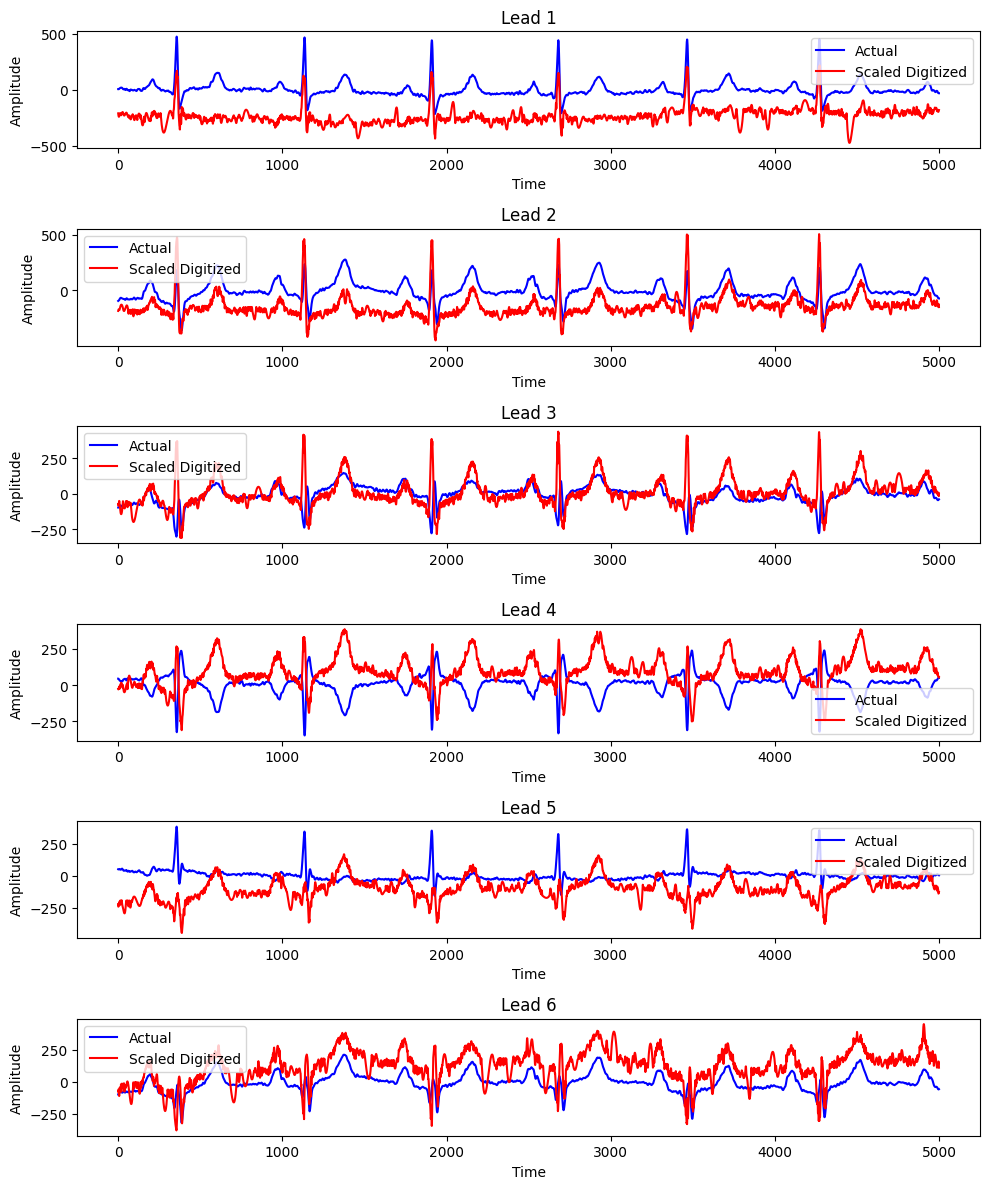

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.interpolate import CubicSpline

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    """
    Plots each lead's time-amplitude for scaled digitized data in a single column layout,
    with digitized data values inverted but without inverting the y-axis.

    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    """
    # Define the lead range you want to plot
    lead_range = range(1, 7)  # This creates a range from 1 to 6 (inclusive)
    num_leads = len(lead_range)

    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead in the specified range
    for i, lead_num in enumerate(lead_range):
        amp_col = f'Lead_{lead_num}_amplitude'

        if amp_col not in digitized_df_scaled.columns:
            print(f"Skipping Lead {lead_num} as it's missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[amp_col]), len(digitized_df_scaled[amp_col]))
        y_actual = actual_df[amp_col].iloc[:length]
        y_digitized = digitized_df_scaled[amp_col].iloc[:length]

        # Invert the digitized values
        y_digitized = -y_digitized

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'Lead {lead_num}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

def smooth_leads_with_cubic_spline(digitized_df):
    """
    Apply cubic spline interpolation to the digitized DataFrame.
    
    :param digitized_df: DataFrame containing digitized lead data.
    :return: Smoothed DataFrame.
    """
    digitized_df_smoothed = digitized_df.copy()

    for lead in digitized_df.columns:
        x = np.arange(len(digitized_df[lead]))  # Create an array for the x values (indices)
        cs = CubicSpline(x, digitized_df[lead])
        digitized_df_smoothed[lead] = cs(x)  # Evaluate the spline at the original x values
    
    return digitized_df_smoothed

# Apply cubic spline smoothing to the digitized data
digitized_df_smoothed = smooth_leads_with_cubic_spline(digitized_df_scaled)

# Plot the smoothed data
plot_scaled_digitized_single_column(digitized_df_smoothed, actual_df)

## Validation with max-min Leads 7-12

PCC Results:
                 Lead       PCC
0   Lead_7_amplitude -0.381691
1   Lead_8_amplitude -0.003736
2   Lead_9_amplitude  0.005504
3  Lead_10_amplitude -0.938722
4  Lead_11_amplitude -0.827964
5  Lead_12_amplitude -0.359373
RMSE Results:
                 Lead        RMSE
0   Lead_7_amplitude  217.397448
1   Lead_8_amplitude  477.908581
2   Lead_9_amplitude  539.322106
3  Lead_10_amplitude  505.328461
4  Lead_11_amplitude  321.234197
5  Lead_12_amplitude  210.433587


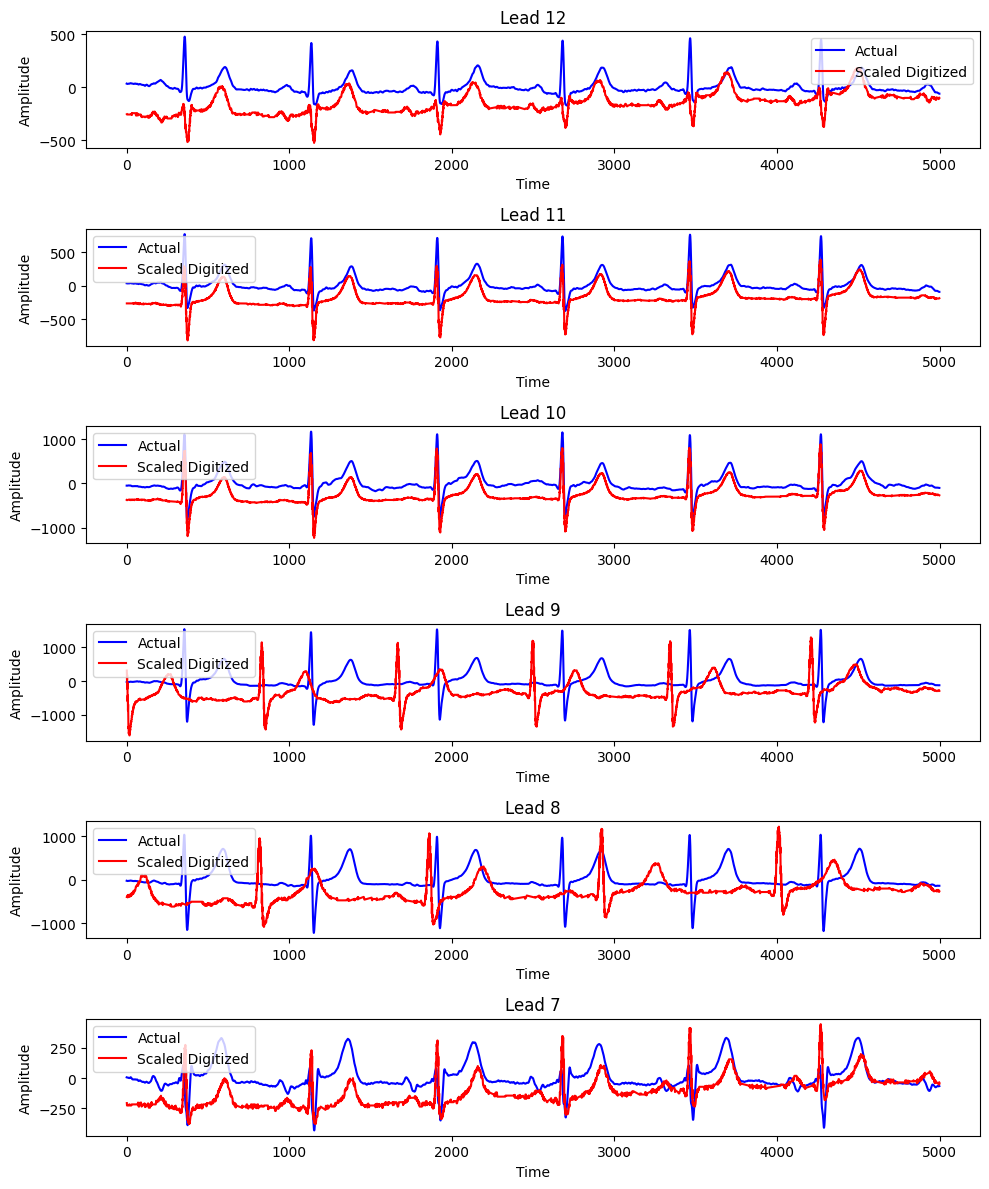

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_leads.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file For 86 page 1

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(7, 13)]  # Lead_7 to Lead_12

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    """
    Plots each lead's time-amplitude for scaled digitized data in a single column layout,
    with digitized data values inverted but without inverting the y-axis.

    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    """
    # Define the lead range you want to plot
    lead_range = range(12, 6, -1)  # This creates a range from 12 to 7 (inclusive)
    num_leads = len(lead_range)

    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead in the specified range
    for i, lead_num in enumerate(lead_range):
        amp_col = f'Lead_{lead_num}_amplitude'

        if amp_col not in digitized_df_scaled.columns:
            print(f"Skipping Lead {lead_num} as it's missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[amp_col]), len(digitized_df_scaled[amp_col]))
        y_actual = actual_df[amp_col].iloc[:length]
        y_digitized = digitized_df_scaled[amp_col].iloc[:length]

        # Invert the digitized values
        y_digitized = -y_digitized

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'Lead {lead_num}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df)




PCC Results:
                 Lead       PCC
0   Lead_7_amplitude -0.798157
1   Lead_8_amplitude -0.947093
2   Lead_9_amplitude -0.943685
3  Lead_10_amplitude -0.009091
4  Lead_11_amplitude -0.840051
5  Lead_12_amplitude -0.691862
RMSE Results:
                 Lead        RMSE
0   Lead_7_amplitude  109.811928
1   Lead_8_amplitude  273.874226
2   Lead_9_amplitude  298.493231
3  Lead_10_amplitude  219.425407
4  Lead_11_amplitude  133.439425
5  Lead_12_amplitude   79.632058


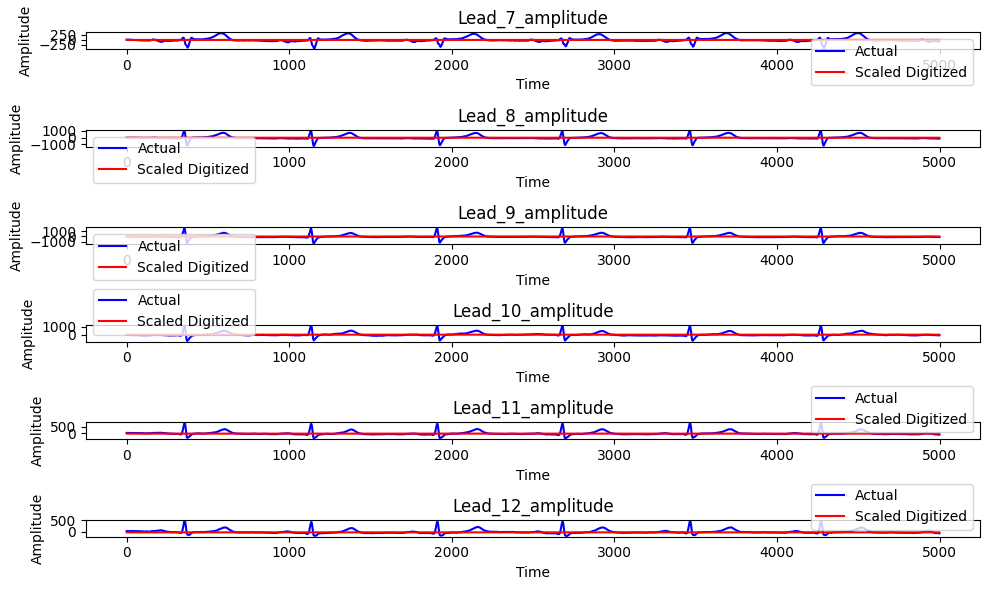

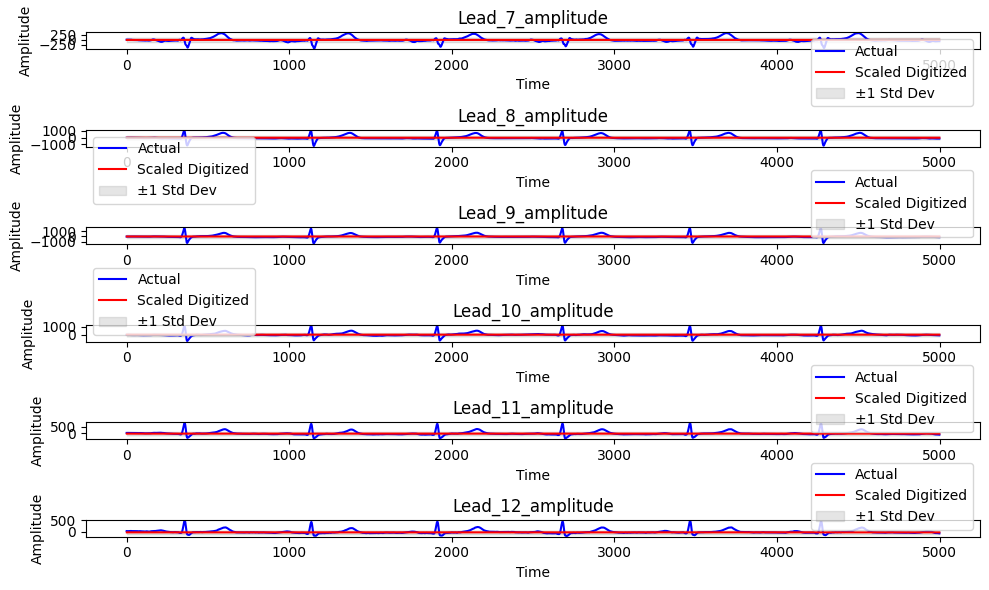

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1


# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# # Leads to validate based on the content of digitized_df
# # Check for existing lead columns in digitized_df
# digitized_leads = [col for col in digitized_df.columns if '_amplitude' in col]
# Define leads for validation
leads_to_validate_digitized = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Digitized leads 1 to 6
leads_to_validate_actual = [f'Lead_{i}_amplitude' for i in range(7, 13)]  # Actual leads 7 to 12

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Calculate PCC and RMSE for each lead
for digitized_lead, actual_lead in zip(leads_to_validate_digitized, leads_to_validate_actual):
    if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
        print(f"Warning: '{digitized_lead}' or '{actual_lead}' is missing in one of the files.")
        continue

    y_true = actual_df[actual_lead]
    y_pred = digitized_df_scaled[digitized_lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': actual_lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': actual_lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, num_leads * 2))

    for i, (digitized_lead, actual_lead) in enumerate(zip(leads_to_validate_digitized, leads_to_validate_actual)):
        if digitized_lead not in digitized_df_scaled.columns:
            print(f"Skipping {digitized_lead} (digitized) as it's missing in the DataFrame")
            continue

        if actual_lead not in actual_df.columns:
            print(f"Skipping {actual_lead} (actual) as it's missing in the DataFrame")
            continue

        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        y_digitized = -y_digitized  # Invert the digitized values

        plt.subplot(6, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'{actual_lead}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df):
    plt.figure(figsize=(10, 6))

    for i, (digitized_lead, actual_lead) in enumerate(zip(leads_to_validate_digitized, leads_to_validate_actual)):
        if digitized_lead not in digitized_df_scaled.columns:
            print(f"Skipping {digitized_lead} (digitized) as it's missing in the DataFrame")
            continue

        if actual_lead not in actual_df.columns:
            print(f"Skipping {actual_lead} (actual) as it's missing in the DataFrame")
            continue

        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        y_digitized = -y_digitized  # Invert the digitized values
        error = y_actual - y_digitized
        std_error = np.std(error)

        plt.subplot(6, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')

        plt.fill_between(
            range(len(y_digitized)),
            y_digitized - std_error,
            y_digitized + std_error,
            color='gray', alpha=0.2, label='±1 Std Dev'
        )

        plt.title(f'{actual_lead}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the functions with your data
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df)
plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df)

